# Speech Recognizer

## Visualizing Audio Signals - Reading from a File and Working on it

### Recording

When you have to read the audio signal from a file, then record it using a microphone, at first.

### Sampling

When recording with microphone, the signals are stored in a digitized form. But to work upon it, the machine needs them in the discrete numeric form. Hence, we should perform sampling at a certain frequency and convert the signal into the discrete numerical form. Choosing the high frequency for sampling implies that when humans listen to the signal, they feel it as a continuous audio signal.

### Example

The following example shows a stepwise approach to analyze an audio signal, using Python, which is stored in a file. The frequency of this audio signal is 44,100 HZ.

Import the necessary packages as shown here −

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
frequency_sampling, audio_signal = wavfile.read("audio.wav")

In [3]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')


Signal shape: (230400, 2)
Signal Datatype: int16
Signal duration: 4.8 seconds


In [4]:
audio_signal = audio_signal / np.power(2, 15)

In [6]:
audio_signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

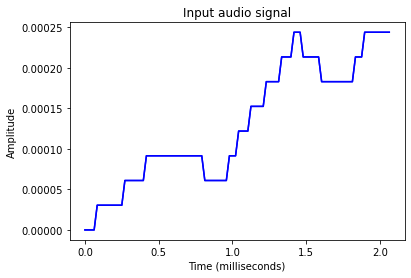

In [8]:
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

### Example

The following example shows, step-by-step, how to characterize the signal, using Python, which is stored in a file. Note that here we are using Fourier Transform mathematical tool to convert it into frequency domain.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [41]:
frequency_sampling, audio_signal = wavfile.read("bass.wav")

In [42]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')


Signal shape: (1757184, 2)
Signal Datatype: int16
Signal duration: 36.61 seconds


In [43]:
audio_signal = audio_signal / np.power(2, 15)

In [44]:
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)

In [45]:
signal_frequency = np.fft.fft(audio_signal)

In [46]:
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2

In [47]:
len_fts = len(signal_frequency)

In [48]:
if length_signal % 2:
   signal_frequency[1:len_fts] *= 2
else:
   signal_frequency[1:len_fts-1] *= 2

In [49]:
signal_power = 10 * np.log10(signal_frequency)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [50]:
x_axis = np.arange(0, len_fts, 1) * (frequency_sampling / length_signal) / 1000.0

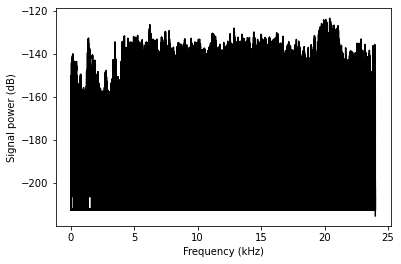

In [51]:
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

## Generating Monotone Audio Signal

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [57]:
output_file = 'audio_signal_generated.wav'

In [58]:
duration = 4 # in seconds
frequency_sampling = 44100 # in Hz
frequency_tone = 784
min_val = -4 * np.pi
max_val = 4 * np.pi

In [60]:
t = np.linspace(min_val, max_val, duration * frequency_sampling)
audio_signal = np.sin(2 * np.pi * frequency_tone * t)

In [62]:
write(output_file, frequency_sampling, audio_signal)

In [65]:
audio_signal = audio_signal[:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

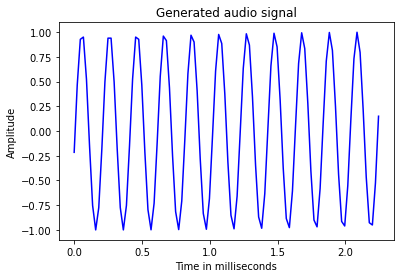

In [66]:
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()